In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch import optim

from fastai.data_block import DataBunch, DatasetType
from fastai.basics import Learner

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Yearly Seasonality

0.0
0.0
-7.786769706960002e-17
-7.786769706960002e-17


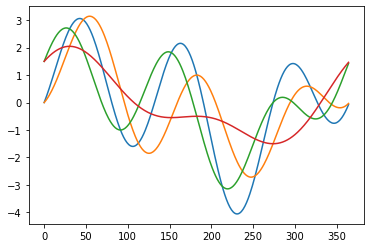

In [2]:
P = 365
N = 365
t = np.arange(N)

# Coefficients
ans = [[1, 0.5, -1.5], [1, 0.5, 0]]
bns = [[1, -0.5, 1.5], [1, 0.5, 0]]

for an in ans:
    for bn in bns:
        s = [a*np.cos(2*np.pi*(n+1)*t/P) + b*np.sin(2*np.pi*(n+1)*t/P)
             for n,(a,b) in enumerate(zip(an, bn))]
        y = sum(s)
        print(y.mean())

        plt.plot(t, y)
plt.show()

## Generate Toy Data with Monthly Trend + Yearly

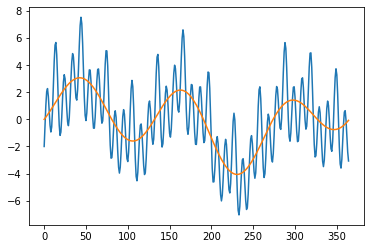

In [3]:
P = 365
P2 = 30.5
N = 365
t = np.arange(N)

# Coefficients
an = [1, 0.5, -1.5]
bn = [1, -0.5, 1.5]

an2 = [-1, 0.5, -1.5]
bn2 = [1, -0.5, 2]

s = [a*np.cos(2*np.pi*(n+1)*t/P) + b*np.sin(2*np.pi*(n+1)*t/P)
     for n,(a,b) in enumerate(zip(an, bn))]
s2 = [a*np.cos(2*np.pi*(n+1)*t/P2) + b*np.sin(2*np.pi*(n+1)*t/P2)
     for n,(a,b) in enumerate(zip(an2, bn2))]

y = sum(s) + sum(s2)

plt.plot(t, y)
plt.plot(t, sum(s))
plt.show()

In [13]:
train_len = int(0.8*len(y))
t_train, y_train = t[:train_len], y[:train_len]
t_test, y_test = t[train_len:], y[train_len:]

In [6]:
cd ..

/Users/sachin/Google Drive/uniwork/prophetorch


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


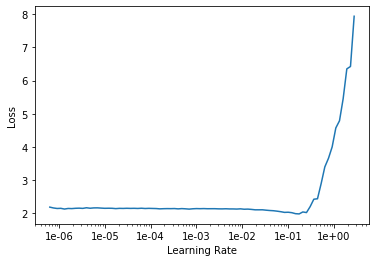

In [14]:
from prophetorch import *

model = Model()
model.find_lr(t_train, y_train)

In [16]:
model.set_lr(5e-2)
model.fit(t_train, y_train)

epoch,train_loss,valid_loss,time
0,4.157083,3.301630,00:00
1,3.494751,11.523807,00:00
2,3.881749,5.541164,00:00
3,3.452579,5.452188,00:00
4,3.426697,4.928643,00:00
5,3.177058,3.396747,00:00
6,3.009976,6.554650,00:00
7,2.952471,2.934080,00:00
8,2.741086,3.761373,00:00
9,2.656547,3.078567,00:00


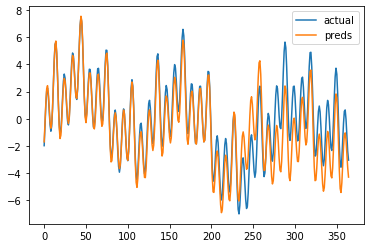

In [18]:
y2 = model(torch.Tensor(t)[:,None])
plt.plot(t, y, label='actual')
plt.plot(t, y2.detach().cpu().numpy().squeeze(), label='preds')
plt.legend()
plt.show()